#**Importing Libraries**

---




In [694]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

---

# **Importing Dataset**

---

In [695]:
water_data= pd.read_csv('/content/422-Project/water_potability.csv')
water_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


---

# **Dataset Description**

---

In [696]:
rows_and_columns= water_data.shape
print("Shape of Data: ", rows_and_columns)
print("Number of rows (Datapoints): ", rows_and_columns[0])
print("Number of colums (Features): ", rows_and_columns[1])

Shape of Data:  (3276, 10)
Number of rows (Datapoints):  3276
Number of colums (Features):  10


In [697]:
water_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


---
# **Feature Analysis**
---

In [698]:
features= water_data.columns
print("Features of the dataset: ",'\n', features)

Features of the dataset:  
 Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [699]:
print("Feature Data Types: ")
feature_data_types= water_data.info()

Feature Data Types: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [700]:
target_variable= water_data['Potability']
print("Target variable data type:")
print(target_variable)

Target variable data type:
0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64


---
# **Correlation Analysis of The Features**
---

In [701]:
corr_of_features= water_data.corr()
corr_of_features

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

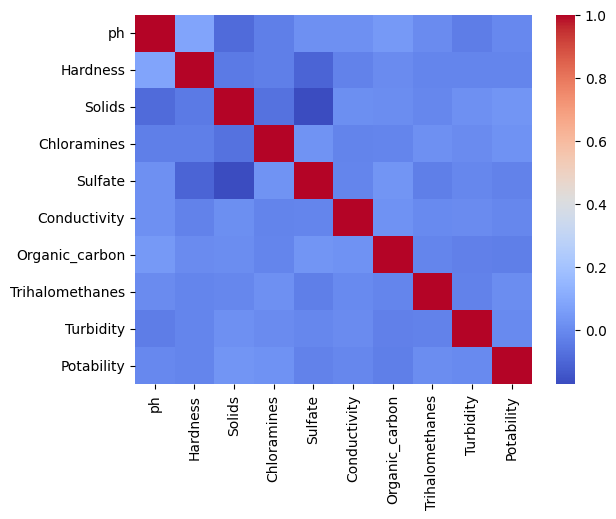

In [702]:
sns.heatmap(corr_of_features, cmap='coolwarm')

# **Checking Imbalanced Dataset**

In [703]:
Drinkable_Water = water_data[water_data["Potability"]==1]

Not_Drinkable_Water = water_data[water_data["Potability"]==0]

print('Rows with Drinkable_Water: ',Drinkable_Water.shape[0])
print('Rows with Not_Drinkable_Water: ',Not_Drinkable_Water.shape[0])

Rows with Drinkable_Water:  1278
Rows with Not_Drinkable_Water:  1998


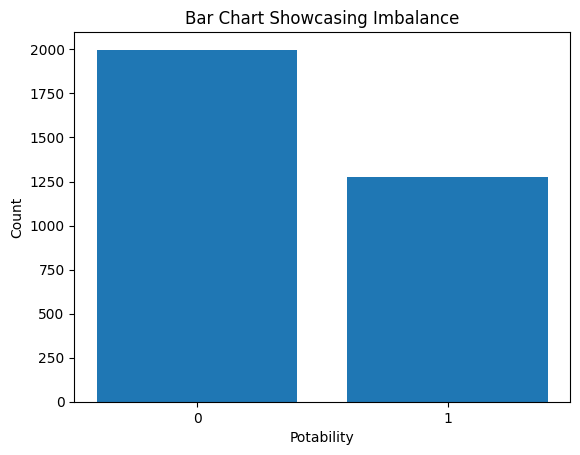

In [704]:
potability_counts = water_data['Potability'].value_counts()

x_values = [0, 1]
y_values = [potability_counts[0], potability_counts[1]]
plt.xticks([0, 1])

plt.bar(x_values, y_values)
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Bar Chart Showcasing Imbalance')

plt.show()

---
# **Dataset Pre-Processing**
---

## **Checking Null Values**

In [705]:
check_null= water_data.isnull().sum()
check_null

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Text(0, 0.5, 'Null Value Percentage')

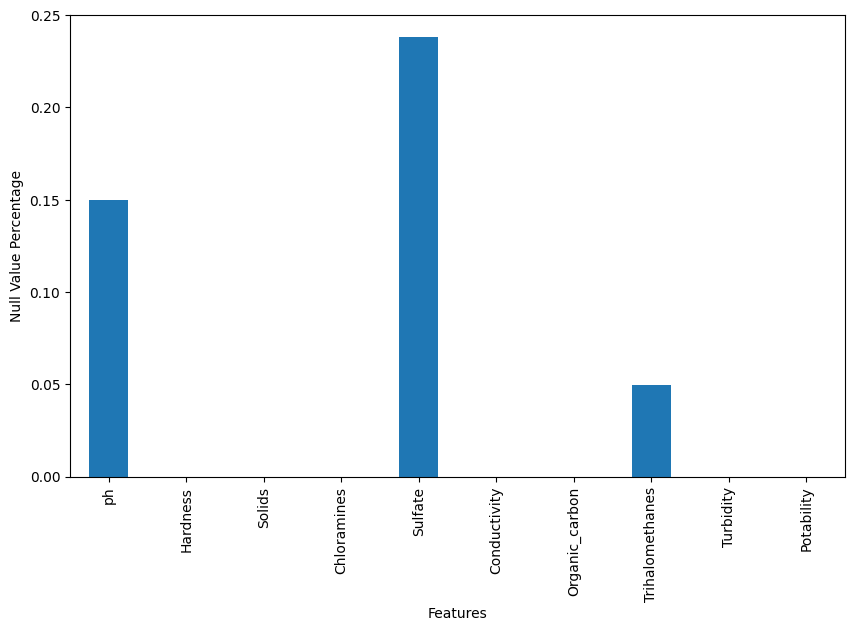

In [706]:
water_data.isnull().mean().plot.bar(figsize=(10,6))
plt.xlabel("Features")
plt.ylabel('Null Value Percentage')

## **Impute Mean Values For Null Values**

In [707]:
fill_values = {
    "ph": water_data["ph"].mean(),
    "Sulfate": water_data["Sulfate"].mean(),
    "Trihalomethanes": water_data["Trihalomethanes"].mean()}

water_data.fillna(value=fill_values, inplace=True)



In [708]:
check_null_new=water_data.isnull().sum()
check_null_new

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## **Separating Features and Target**

In [709]:
Features, Target = water_data.drop("Potability", axis=1), water_data["Potability"]
x,y = Features,Target
print("Features: ", x.shape)
print("Target: ", y.shape)


Features:  (3276, 9)
Target:  (3276,)


## **Balancing Data (Under Sampling)**

In [710]:
print("Before Under Sampling: ")
print("Features shape: ", x.shape)
print("Target shape: ", y.shape)

Before Under Sampling: 
Features shape:  (3276, 9)
Target shape:  (3276,)


In [711]:
from imblearn.under_sampling import RandomUnderSampler
x, y = RandomUnderSampler().fit_resample(x, y)
print("After Under Sampling: ")
print("Features shape: ", x.shape)
print("Target shape: ", y.shape)

After Under Sampling: 
Features shape:  (2556, 9)
Target shape:  (2556,)


## **Feature Scaling**

In [712]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.90535017, -0.31779564,  0.96222381, ..., -0.24574364,
        -0.0057499 , -0.93070233],
       [-0.55549621, -0.32834659,  0.30223274, ..., -0.19062239,
         0.16781416,  0.90219367],
       [ 0.00662736,  0.60648055, -0.4833703 , ...,  0.36391258,
         1.06213996, -1.74575127],
       ...,
       [ 1.62596785, -0.62851546,  1.25714393, ..., -0.98291678,
         0.2124991 , -0.85789516],
       [-1.34635552,  1.02691434, -1.15365271, ..., -0.94318375,
         0.696113  ,  0.94590415],
       [ 0.55631233, -0.04473012, -0.53644889, ...,  0.5777197 ,
         0.77269287, -2.1242375 ]])

## **Train and Test data split**

In [713]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
print("Train Data Shape: ",x_train.shape)
print("Test Data Shape: ",x_test.shape)

Train Data Shape:  (1789, 9)
Test Data Shape:  (767, 9)


# **Model Training and Testing**

## **Logistic Regression**

In [714]:
from sklearn.linear_model import LogisticRegression
LR_model= LogisticRegression()

In [715]:
LR_model.fit(x_train,y_train)

LogisticRegression()

In [716]:
LR_pred = LR_model.predict(x_test)
LR_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [717]:
LG_accuracy = math.ceil(accuracy_score(y_test, LR_pred)*100)
print("Logistic Regression Model Accuracy:",LG_accuracy,"%")

Logistic Regression Model Accuracy: 51 %


In [718]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.52      0.42      0.46       394
           1       0.49      0.58      0.53       373

    accuracy                           0.50       767
   macro avg       0.50      0.50      0.50       767
weighted avg       0.50      0.50      0.50       767



<Axes: >

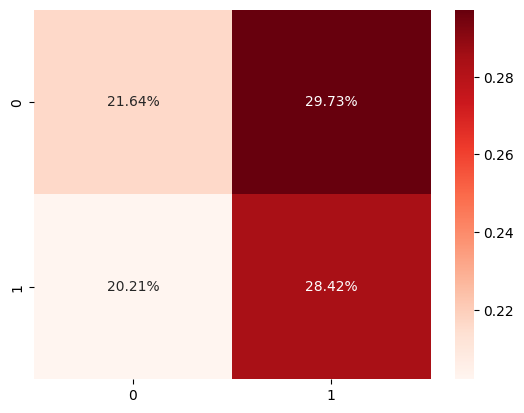

In [719]:
LG_cm= confusion_matrix(y_test, LR_pred)
sns.heatmap(LG_cm/np.sum(LG_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Naive Bayes**

In [720]:
from sklearn.naive_bayes import GaussianNB

In [721]:
NV_model = GaussianNB()

In [722]:
NV_model.fit(x_train, y_train)

GaussianNB()

In [723]:
NV_pred= NV_model.predict(x_test)
NV_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [724]:
NV_accuracy = math.ceil(accuracy_score(y_test, NV_pred)*100)
print("Naive Bayes Model Accuracy:",NV_accuracy,"%")

Naive Bayes Model Accuracy: 60 %


In [725]:
print(classification_report(y_test,NV_pred))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64       394
           1       0.61      0.49      0.54       373

    accuracy                           0.60       767
   macro avg       0.60      0.59      0.59       767
weighted avg       0.60      0.60      0.59       767



<Axes: >

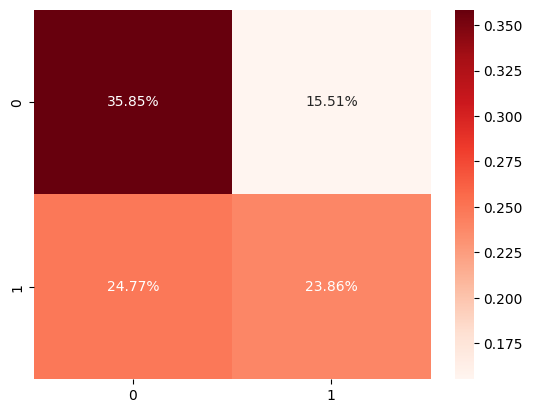

In [726]:
NV_cm= confusion_matrix(y_test, NV_pred)
sns.heatmap(NV_cm/np.sum(NV_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')

# KNN Classifier

In [727]:
from sklearn.neighbors import KNeighborsClassifier

In [728]:
KN_model = KNeighborsClassifier(n_neighbors=11, leaf_size=20)

In [729]:
KN_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=11)

In [730]:
KN_pred = KN_model.predict(x_test)
KN_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,

In [731]:
KN_accuracy = math.ceil(accuracy_score(y_test, KN_pred)*100)
print("KNN Model Accuracy:",KN_accuracy,"%")

KNN Model Accuracy: 62 %


In [732]:
print(classification_report(y_test,KN_pred))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       394
           1       0.61      0.60      0.60       373

    accuracy                           0.62       767
   macro avg       0.62      0.62      0.62       767
weighted avg       0.62      0.62      0.62       767



<Axes: >

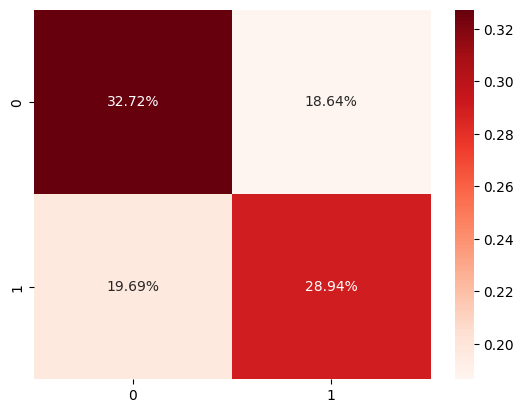

In [733]:
KN_cm = confusion_matrix(y_test, KN_pred)
sns.heatmap(KN_cm/np.sum(KN_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')

# **Support Vector Machine**

In [734]:
from sklearn.svm import SVC

In [735]:
SVM_model = SVC(kernel="rbf")

In [736]:
SVM_model.fit(x_train, y_train)

SVC()

In [737]:
SVM_pred = SVM_model.predict(x_test)
SVM_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [738]:
SVM_accuracy = math.ceil(accuracy_score(y_test, SVM_pred)*100)
print("SVM Model Accuracy:",SVM_accuracy,"%")

SVM Model Accuracy: 68 %


In [740]:
print(classification_report(y_test,SVM_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       394
           1       0.69      0.62      0.65       373

    accuracy                           0.68       767
   macro avg       0.68      0.68      0.68       767
weighted avg       0.68      0.68      0.68       767



<Axes: >

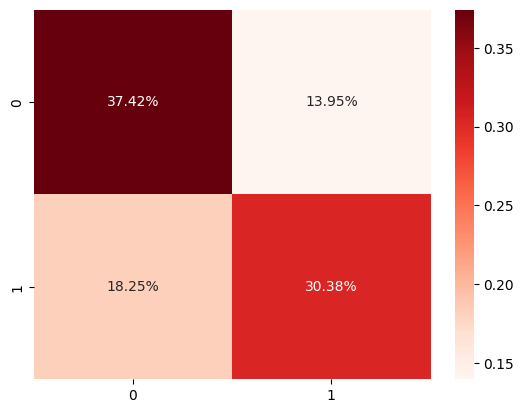

In [741]:
SVM_cm = confusion_matrix(y_test, SVM_pred)
sns.heatmap(SVM_cm/np.sum(SVM_cm), annot = True, fmt=  '0.2%', cmap = 'Reds')

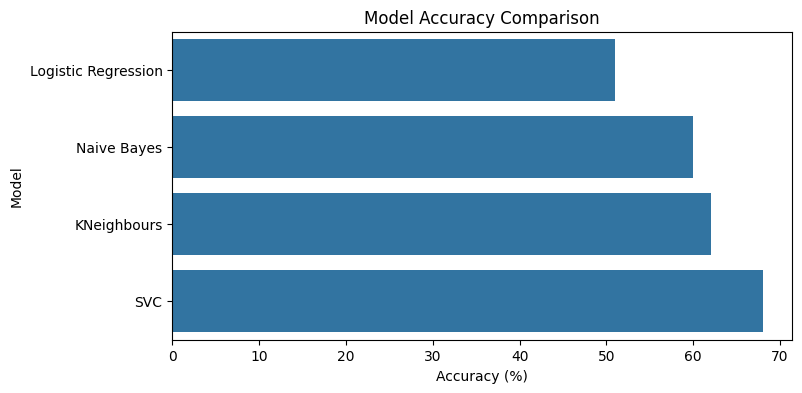

In [739]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNeighbours', 'SVC'],
    'Accuracy_score': [LG_accuracy, NV_accuracy, KN_accuracy, SVM_accuracy ]
})
plt.figure(figsize=(8, 4))
sns.barplot(x='Accuracy_score', y='Model', data=models)

plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')

plt.show()